# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 



# Bryant & Lempert

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the peel_alpha in PRIM. This controls the leniency of the algorithm.


In [1]:
import pandas as pd
data_bryant = pd.read_csv('data/Bryant et al 2010.csv')
experiments_bryant = data_bryant.iloc[:, 2:11]
outcomes_bryant = data_bryant.iloc[:, 15]

In [2]:
from ema_workbench.analysis import prim
prim_alg_bryant = prim.Prim(experiments_bryant, outcomes_bryant, threshold=0.8, peel_alpha=0.1)
box_bryant = prim_alg_bryant.find_box()

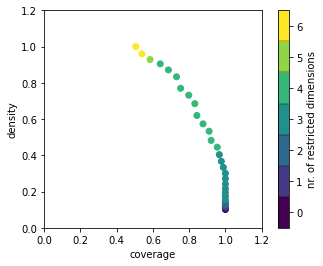

In [15]:
import matplotlib.pyplot as plt
box_bryant.show_tradeoff()
plt.show()

In the plot above we can see the tradeoff between the density and the coverage of the boxes. According to the rule of thumb presented in the lecture, we decide to have a minimum density of 0.8. The first box that satisfices this constraint is box 22. Therefore we decide to further analyze box 22.

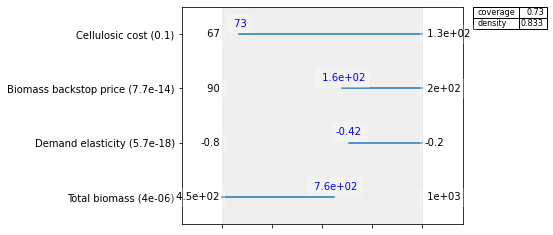

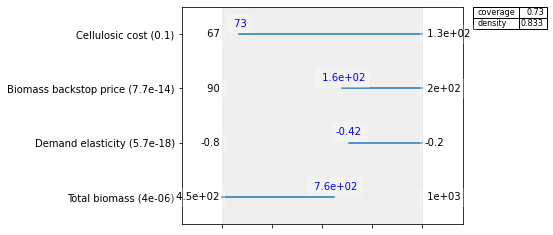

In [5]:
box_bryant.inspect(22, style='graph')

In the plots above the parameter ranges for the independent variables of box 22 can be seen. As the p-test indicates, the Cellulosic cost variable is not statistically significant, therefore we can omit it from further analysis. This is also reflected in the range of variables, as it covers nearly all possible values for the Cellulosic cost. 

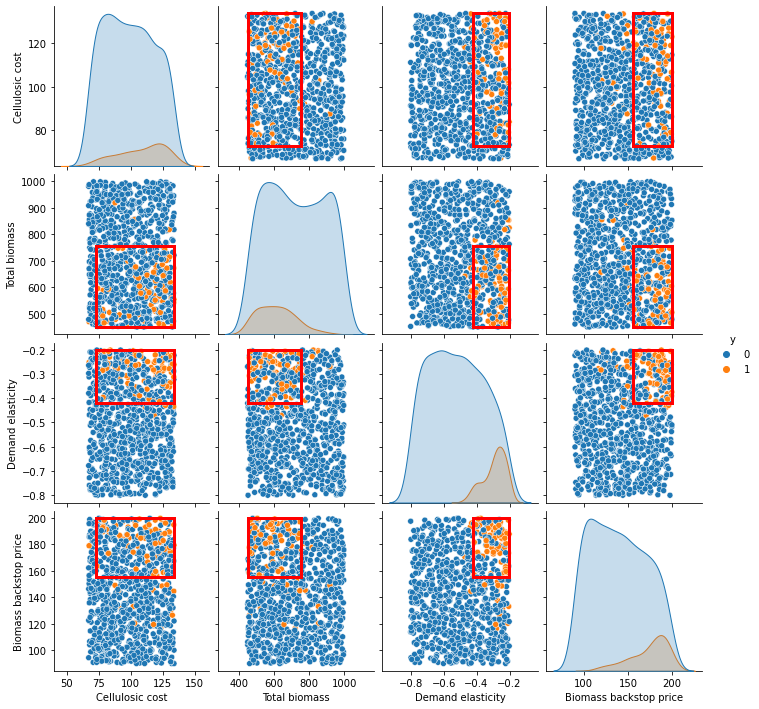

In [6]:
box_bryant.select(22)
fig = box_bryant.show_pairs_scatter()
plt.show()

The pairplot above visualizes the boxes. As we can see, the statistically insignificant Cellulosic cost spans a large range of the total values.

# Rozenberg et al


* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM


In [8]:
data_rozenberg = pd.read_csv('data/Rozenberg et al 2014.csv')
experiments_rozenberg = data_rozenberg.iloc[:, 0:7]

In [14]:
data_rozenberg['SSP1']

0      0
1      0
2      0
3      0
4      0
      ..
281    0
282    1
283    1
284    0
285    1
Name: SSP1, Length: 286, dtype: int64

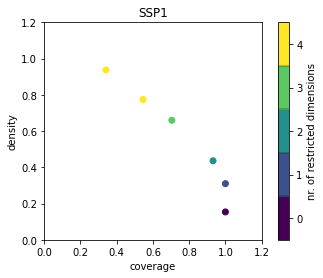

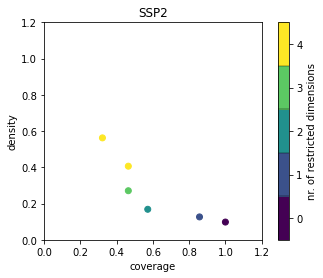

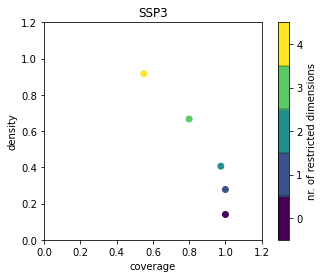

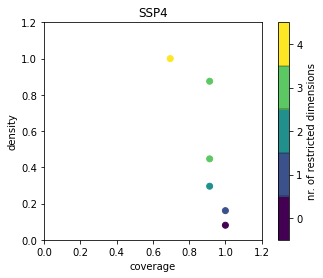

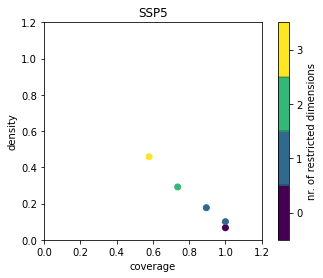

In [40]:
for ssp in ['SSP'+str(i) for i in range(1,6)]:
    outcomes_rozenberg = data_rozenberg[ssp].values
    
    prim_alg_rozenberg = prim.Prim(experiments_rozenberg, outcomes_rozenberg, threshold=0.3, peel_alpha=0.1)
    box_rozenberg = prim_alg_rozenberg.find_box()
    box_rozenberg.show_tradeoff()
    plt.title(ssp)
    plt.show()

We have plotted the density and coverage of all the different boxes of the SSP's. We can see that the boxes for each SSP vary wildly. For SSP1 and SSP3 we see that only one box fulfills the rule of thumb of density > 0.8. For the other SSP's there is no box that reaches this threshold. This means that the box contains a lot of 'impurities'. Depending on the coverage fraction, the box can be interpreted in two ways. If the coverage is high, the box spans a large area and the outcomes above the threshold are spread out over the total outcome space. Vice versa, if the coverage is low, the outcomes above the threshold are closer in the outcome space.

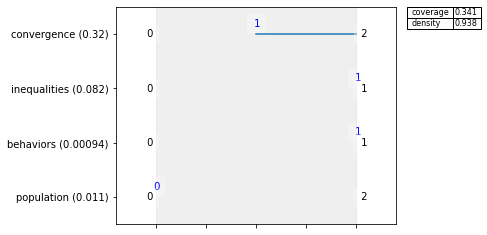

In [38]:
outcomes_rozenberg = data_rozenberg['SSP1'].values
    
prim_alg_rozenberg = prim.Prim(experiments_rozenberg, outcomes_rozenberg, threshold=0.8, peel_alpha=0.01)
box_rozenberg = prim_alg_rozenberg.find_box()
box_rozenberg.inspect(5, style='graph')
plt.show()

The figure above displays the ranges of the dependent variables. Only the population and behaviours are statistically significant. Both these parameters have no range of values. So the 'box' of the independent variables is not a 'box', but a point. Therefore it does not make sense to visualize the boxes.

# Hamarat et al

this is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


In [ ]:
data = outcomes['fraction renewables']
# y = data[0,:] < data[-1, :]
r1 = outcomes[y1] < t1
r2 = outcomes[y2] > t2
r3 = outocmes[y3] < t3
rc = r1 or (r2 or r3)

